In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [53]:
train = pd.read_csv('/Users/owner/Desktop/Cathay_BigData-Competition/Data/train.csv',encoding = 'big5')
test = pd.read_csv('/Users/owner/Desktop/Cathay_BigData-Competition/Data/test.csv',encoding = 'big5')

In [88]:
train

,CUS_ID,GENDER,AGE,CHARGE_CITY_CD,CONTACT_CITY_CD,EDUCATION_CD,MARRIAGE_CD,LAST_A_CCONTACT_DT,L1YR_A_ISSUE_CNT,LAST_A_ISSUE_DT,...,L1YR_GROSS_PRE_AMT,CUST_9_SEGMENTS_CD,FINANCETOOLS_A,FINANCETOOLS_B,FINANCETOOLS_C,FINANCETOOLS_D,FINANCETOOLS_E,FINANCETOOLS_F,FINANCETOOLS_G,Y1
0,3418,M,低,A1,A1,NaN,NaN,Y,0,N,...,0.000174,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,4302,M,低,A1,A1,NaN,NaN,Y,0,N,...,0.008724,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,5545,M,低,A1,A1,1.0,0.0,Y,1,Y,...,0.005359,A,Y,N,N,N,N,N,N,N
3,7207,M,低,A1,A1,NaN,0.0,Y,0,N,...,0.000000,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,7213,M,低,A1,A1,1.0,0.0,N,0,N,...,0.000603,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
5,8818,M,低,A1,A1,NaN,0.0,Y,0,N,...,0.000243,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
6,9681,M,低,A1,A1,NaN,0.0,N,0,N,...,0.002600,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
7,9743,M,低,A1,A1,NaN,0.0,Y,0,N,...,0.002887,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
8,9839,M,低,A1,A1,1.0,0.0,N,0,N,...,0.000140,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
9,10246,M,低,A1,A1,NaN,0.0,N,0,N,...,0.000182,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [86]:
train['Y1'].value_counts()

N    98000
Y     2000
Name: Y1, dtype: int64

In [55]:
train.isnull().sum()

CUS_ID                     0
GENDER                   683
AGE                        0
CHARGE_CITY_CD             0
CONTACT_CITY_CD            0
EDUCATION_CD           20562
MARRIAGE_CD             7951
LAST_A_CCONTACT_DT         0
L1YR_A_ISSUE_CNT           0
LAST_A_ISSUE_DT            0
L1YR_B_ISSUE_CNT           0
LAST_B_ISSUE_DT            0
CHANNEL_A_POL_CNT          0
CHANNEL_B_POL_CNT          0
OCCUPATION_CLASS_CD     3960
APC_CNT                    0
INSD_CNT                   0
APC_1ST_AGE            43282
INSD_1ST_AGE             171
IF_2ND_GEN_IND             0
APC_1ST_YEARDIF        43282
RFM_R                  43294
REBUY_TIMES_CNT        43282
LEVEL                  43305
RFM_M_LEVEL            43282
LIFE_CNT                   0
IF_ISSUE_A_IND             0
IF_ISSUE_B_IND             0
IF_ISSUE_C_IND             0
IF_ISSUE_D_IND             0
                       ...  
IF_ISSUE_INSD_D_IND    20083
IF_ISSUE_INSD_E_IND    20083
IF_ISSUE_INSD_F_IND    20083
IF_ISSUE_INSD_

In [56]:
num_features = [ ]
for dtype, feature in zip(train.dtypes, train.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric Features : {num_features}\n')

42 Numeric Features : ['CUS_ID', 'EDUCATION_CD', 'MARRIAGE_CD', 'L1YR_A_ISSUE_CNT', 'L1YR_B_ISSUE_CNT', 'CHANNEL_A_POL_CNT', 'CHANNEL_B_POL_CNT', 'OCCUPATION_CLASS_CD', 'APC_CNT', 'INSD_CNT', 'APC_1ST_YEARDIF', 'LEVEL', 'RFM_M_LEVEL', 'ANNUAL_PREMIUM_AMT', 'AG_CNT', 'AG_NOW_CNT', 'CLC_CUR_NUM', 'ANNUAL_INCOME_AMT', 'L1YR_C_CNT', 'BANK_NUMBER_CNT', 'INSD_LAST_YEARDIF_CNT', 'BMI', 'IM_CNT', 'TERMINATION_RATE', 'TOOL_VISIT_1YEAR_CNT', 'DIEBENEFIT_AMT', 'DIEACCIDENT_AMT', 'POLICY_VALUE_AMT', 'ANNUITY_AMT', 'EXPIRATION_AMT', 'ACCIDENT_HOSPITAL_REC_AMT', 'DISEASES_HOSPITAL_REC_AMT', 'OUTPATIENT_SURGERY_AMT', 'INPATIENT_SURGERY_AMT', 'PAY_LIMIT_MED_MISC_AMT', 'FIRST_CANCER_AMT', 'ILL_ACCELERATION_AMT', 'ILL_ADDITIONAL_AMT', 'LONG_TERM_CARE_AMT', 'MONTHLY_CARE_AMT', 'LIFE_INSD_CNT', 'L1YR_GROSS_PRE_AMT']



In [74]:
train1 = train[num_features]
train1.head()

,CUS_ID,EDUCATION_CD,MARRIAGE_CD,L1YR_A_ISSUE_CNT,L1YR_B_ISSUE_CNT,CHANNEL_A_POL_CNT,CHANNEL_B_POL_CNT,OCCUPATION_CLASS_CD,APC_CNT,INSD_CNT,...,OUTPATIENT_SURGERY_AMT,INPATIENT_SURGERY_AMT,PAY_LIMIT_MED_MISC_AMT,FIRST_CANCER_AMT,ILL_ACCELERATION_AMT,ILL_ADDITIONAL_AMT,LONG_TERM_CARE_AMT,MONTHLY_CARE_AMT,LIFE_INSD_CNT,L1YR_GROSS_PRE_AMT
0,3418,NaN,NaN,0,0,0,0,1.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015625,0.000174
1,4302,NaN,NaN,0,0,0,0,1.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015625,0.008724
2,5545,1.0,0.0,1,0,1,0,1.0,1,0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.031250,0.005359
3,7207,NaN,0.0,0,0,0,0,1.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015625,0.000000
4,7213,1.0,0.0,0,0,1,0,1.0,1,0,...,0.0,0.0,0.0,0.04717,0.0,0.0,0.0,0.0,0.062500,0.000603


In [75]:
a = train1.columns[train1.isna().any()].tolist()
a

['EDUCATION_CD',
 'MARRIAGE_CD',
 'OCCUPATION_CLASS_CD',
 'APC_1ST_YEARDIF',
 'LEVEL',
 'RFM_M_LEVEL',
 'ANNUAL_PREMIUM_AMT',
 'ANNUAL_INCOME_AMT',
 'L1YR_C_CNT',
 'INSD_LAST_YEARDIF_CNT',
 'BMI',
 'TERMINATION_RATE',
 'DIEBENEFIT_AMT',
 'DIEACCIDENT_AMT',
 'POLICY_VALUE_AMT',
 'ANNUITY_AMT',
 'EXPIRATION_AMT',
 'ACCIDENT_HOSPITAL_REC_AMT',
 'DISEASES_HOSPITAL_REC_AMT',
 'OUTPATIENT_SURGERY_AMT',
 'INPATIENT_SURGERY_AMT',
 'PAY_LIMIT_MED_MISC_AMT',
 'FIRST_CANCER_AMT',
 'ILL_ACCELERATION_AMT',
 'ILL_ADDITIONAL_AMT',
 'LONG_TERM_CARE_AMT',
 'MONTHLY_CARE_AMT']

In [67]:
train_y = train['Y1']
train_num = train_y.shape[0]

labelencoder = LabelEncoder()
train_y = labelencoder.fit_transform(train_y)
train_y

array([0, 0, 0, ..., 1, 0, 0])

In [76]:
train2 = train1[a].fillna(train1[a].mean())
train2.head()

,EDUCATION_CD,MARRIAGE_CD,OCCUPATION_CLASS_CD,APC_1ST_YEARDIF,LEVEL,RFM_M_LEVEL,ANNUAL_PREMIUM_AMT,ANNUAL_INCOME_AMT,L1YR_C_CNT,INSD_LAST_YEARDIF_CNT,...,ACCIDENT_HOSPITAL_REC_AMT,DISEASES_HOSPITAL_REC_AMT,OUTPATIENT_SURGERY_AMT,INPATIENT_SURGERY_AMT,PAY_LIMIT_MED_MISC_AMT,FIRST_CANCER_AMT,ILL_ACCELERATION_AMT,ILL_ADDITIONAL_AMT,LONG_TERM_CARE_AMT,MONTHLY_CARE_AMT
0,2.169075,0.315289,1.0,0.046512,3.0,3.0,0.000192,0.001667,1.994446,0.052632,...,0.151623,0.136661,0.089922,0.058821,0.094473,0.014284,0.004284,0.002229,0.002394,0.018912
1,2.169075,0.315289,1.0,0.046512,5.0,3.0,0.009675,0.000167,1.994446,0.052632,...,0.151623,0.136661,0.089922,0.058821,0.094473,0.014284,0.004284,0.002229,0.002394,0.018912
2,1.000000,0.000000,1.0,0.000000,5.0,3.0,0.000292,0.000125,1.994446,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2.169075,0.000000,1.0,0.162791,5.0,3.0,0.001235,0.004167,1.994446,0.210526,...,0.151623,0.136661,0.089922,0.058821,0.094473,0.014284,0.004284,0.002229,0.002394,0.018912
4,1.000000,0.000000,1.0,0.116279,2.0,3.0,0.000664,0.000083,1.994446,0.078947,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.047170,0.000000,0.000000,0.000000,0.000000


In [77]:
#split dataset in features and target variable
x = train2 # Features
y = train_y # Target variable
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, random_state=0)

In [78]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(x_train,y_train)

y_pred=logreg.predict(x_test)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0.5, 257.44, 'Predicted label')

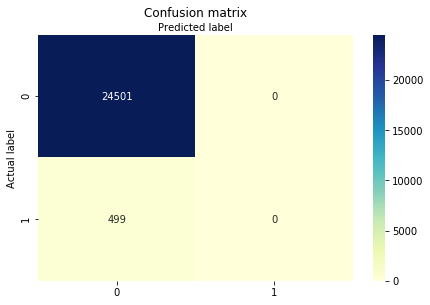

In [79]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [87]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.98004
Precision: 0.0
Recall: 0.0


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
